In [42]:
import numpy as np
import random
import matplotlib.pyplot as plt

num_points = 100
k = 4

In [43]:
def init_board_gauss(num_points, k):
    n = float(num_points)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1, 1), random.uniform(-1, 1))
        s = random.uniform(0.05,0.5)
        x = []
        while len(x) < n:
            a, b = np.array([np.random.normal(c[0], s), np.random.normal(c[1], s)])
            if abs(a) < 1 and abs(b) < 1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:num_points]
    return X

In [44]:
def init_data(num_points):
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(num_points)])
    return X

In [45]:
def plot_points(X):
    plt.plot(X, 'ro')
    plt.show()

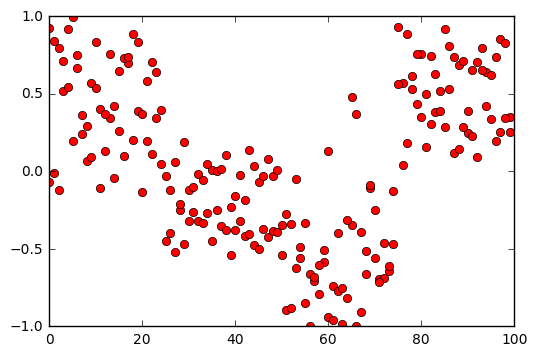

In [47]:
X = init_board_gauss(num_points, k)
plot_points(X)

In [70]:
def randomize_centroids(data, centroids, k):
    for cluster in range(0, k):
        centroids.append(data[np.random.randint(len(data))].flatten())
    return centroids

In [85]:
centroids = []
centroids = randomize_centroids(X, centroids, k)
print(colormap[centroids])

NameError: name 'colormap' is not defined

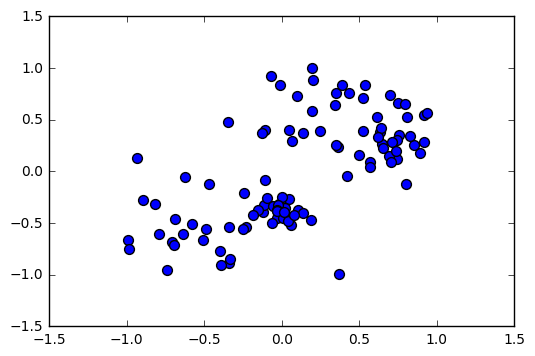

In [88]:
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

In [74]:
def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters

In [59]:
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu

In [62]:
def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu])

SyntaxError: unexpected EOF while parsing (<ipython-input-62-137326a8cb35>, line 2)

In [61]:
def find_centers(X, K):
    # Initialize to K random centers
    oldmu = random.sample(X, K)
    mu = random.sample(X, K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)